<p  style="z-index: 101;background: #fde073;text-align: center;line-height: 2.5;overflow: hidden;font-size:22px;">Please <a href="https://github.com/ECSIM/opem#cite" target="_blank">cite us</a> if you use the software</p>

#  Padulles-Amphlett Dynamic Model

### Version 1.3

<ul>
    <li><a href="#Overview">Overview</a></li>
    <li><a href="#Nernst-Voltage">Nernst Voltage</a></li>
    <li><a href="#PEM-Losses-Model">PEM Losses Model</a></li>
    <ul>
        <li><a href="#Activation">Activation</a></li>
        <li><a href="#Ohmic">Ohmic</a></li>
        <li><a href="#Concentration">Concentration</a></li>
        <li><a href="#VCell-&-VStack">VCell & VStack</a></li>
    </ul>
    <li><a href="#Power-of-PEMFC">Power of PEMFC</a></li>
    <li><a href="#Efficiency-of-PEMFC">Efficiency of PEMFC</a></li>
    <li><a href="#Linear-Approximation">Linear Approximation</a></li>
    <li><a href="#Overall-Parameters">Overall Parameters</a></li>
    <li><a href="#Full-Run">Full Run</a></li>
    <li><a href="#Plot">Plot</a></li>
    <li><a href="#Parameters">Parameters</a></li>
    <li><a href="#Reference">Reference</a></li>   
</ul>

## Overview

<p style="text-align:justify;">
The Padulles dynamic model can predict the transient response of cell voltage, temperature of the cell, hydrogen/oxygen out flow rates and cathode and anode channel temperatures/pressures under sudden change in load current. Hence, a dynamic fuel cell simulation is developed in this model, which incorporates the dynamics of flow and pressure in the anode and cathode channels and mass/ heat transfer transient features in the fuel cell body.
<br/>This model is based on several assumptions: 
<ol>    
<li>The stack is fed with hydrogen and air</li>    
<li>Cell temperature is stable at all times</li>   
<li>The ratio of pressures between the interior and exterior of the electrode channels is large</li>  
<li>The channels that transport gases along the electrodes have a fixed volume </li>    
<li>Only source of voltage loss is ohmic polarization</li>     
<li>Nernst equation can be applied too</li>  
</ol>
</p>

<p style="text-align:justify;">
This model is an integration of Padulles-Hauer dynamic model with Amphlett static model. The advantage of this dynamic model is using Amphlett equation for simulating the polarization values. Amphlett model as the most complicated and preferable static model, but the most precise. Based on this model, the obtained polarization voltage is identical to the experimental results.  
</p>    

<div style="text-align:center;">
    
<img src="images/Padulles-Amphlett-Diagram.jpg">  
<p style="text-align:center;">Fig1. Padulles-Amphlett Dynamic Model Block Diagram </p>
    
</div>

## Nernst Voltage

$$E_{Nernst}=N_0\times [E_0+\frac{RT}{2F}ln(\frac{P_{H_2}\times \sqrt{P_{O_2}}}{P_{H_2O}})]$$

$$P_{H_2}=\frac{\frac{1}{K_{H_2}}}{1+\tau_{H_2}^{(s)}}[(q_{H_2}^{(inlet)}-(2\times K_r \times i)]$$

$$\frac{q_{H_2}^{(inlet)}}{q_{methanol}}=\frac{CV}{\tau_{1}^{(s)}+(\tau_{2}^{(s)})^2+(\tau_{1}+\tau_{2})^{(s)}+1}$$

$$P_{O_2}=\frac{\frac{1}{K_{O_2}}}{1+\tau_{O_2}^{(s)}}[(q_{O_2}^{(inlet)}-(K_r \times i)]$$

$$P_{H_2O}=\frac{\frac{1}{K_{H_2O}}}{1+\tau_{H_2O}^{(s)}}[(q_{H_2O}^{(inlet)}-(2\times K_r \times i)]$$

$$K_r=\frac{N_0}{4F}$$

$$q_{O_2}^{(inlet)}=\frac{q_{H_2}^{(inlet)}}{r_{h-o}}$$

$$q_{H_2O}^{(inlet)}=q_{H_2}^{(inlet)}$$

In [1]:
from opem.Dynamic.Padulles_Amphlett import qH2_Calc,Kr_Calc,qO2_Calc,PH2_Calc,PO2_Calc,PH2O_Calc,Enernst_Calc

In [2]:
qH2=qH2_Calc(qMethanol=0.0002,CV=2,t1=2,t2=2)
qH2

3.6363636363636364e-05

In [3]:
Kr=Kr_Calc(N0=5)
Kr

1.2955435375179044e-08

In [4]:
qO2=qO2_Calc(qH2=qH2,rho=1.168)
qO2

3.113325031133251e-05

In [5]:
PH2=PH2_Calc(KH2=0.0000422,tH2=3.37,Kr=Kr,I=1,qH2=qH2)
PH2

0.19704428889827239

In [6]:
PO2=PO2_Calc(KO2=0.0000211,tO2=6.74,Kr=Kr,I=1,qO2=qO2)
PO2

0.1905549730945132

In [7]:
PH2O=PH2O_Calc(KH2O=0.000007716,tH2O=18.418,Kr=Kr,I=1,qH2O=qH2)
PH2O

0.2425275190047356

In [8]:
Enernst=Enernst_Calc(E0=0.6,N0=5,T=343, PH2=PH2, PO2=PO2,PH2O=PH2O)
Enernst

2.9234016588243374

## PEM Losses Model

### Activation

$$\eta_{activation}=\xi_{1}+\xi_{2}T+\xi_{3}T[ln(C_{O_{2}})]+\xi_{4}T[ln(i)]$$

$$\xi_{1}=-0.948$$

$$\xi_{2}=0.00286+0.0002\times ln(A)+(4.3\times10^{-5})[ln(C_{H_{2}})]$$

$$\xi_{3}=7.6\times10^{-5}$$

$$\xi_{4}=-1.93\times10^{-4}$$

$$C_{H_{2}}=\frac{P_{H_2}}{1.09\times10^{6}\times exp(\frac{77}{T})}$$

$$C_{O_{2}}=\frac{P_{O_2}}{5.08\times10^{6}\times exp(\frac{-498}{T})}$$

In [9]:
from opem.Dynamic.Padulles_Amphlett import Eta_Act_Calc
Eta_Act=Eta_Act_Calc(T=343,PO2=PO2 , PH2=PH2, i=2, A=50.6)
Eta_Act

0.38390602046791616

### Ohmic

$$\eta_{ohmic}=i(R_{electronic}+R_{Proton})$$

$$R_{Proton}=\frac{\rho_m\times I}{A}$$

$$\rho_m=\frac{181.6[1+0.03(\frac{i}{A})+0.062(\frac{T}{303})^2(\frac{i}{A})^{2.5}]}{[\lambda-0.634-3(\frac{i}{A})]exp[4.18(\frac{T-303}{T})]}$$

* R-Electronic Should be approximately constant over the relatively narrow
temperature range of PEM fuel cell operation.
Therefore, the parameter R-Electronic can be taken as a constant, but
is generally difficult to predict and, therefore, is initially an unknown.

In [10]:
from opem.Dynamic.Padulles_Amphlett import Eta_Ohmic_Calc
Eta_Ohmic=Eta_Ohmic_Calc(i=2, l=0.0178, A=50.6, T=343, lambda_param=23, R_elec=0)
Eta_Ohmic

0.003531492225469087

### Concentration

$$B=\frac{RT}{nF}$$

$$\eta_{Concentration}=-B\times ln(1-\frac{J}{J_{Max}})$$

$$J=\frac{i}{A}$$

$$J_{Max}=\frac{i_L}{A}$$

In [11]:
from opem.Dynamic.Padulles_Amphlett import Eta_Conc_Calc
Eta_Conc=Eta_Conc_Calc(i=2, A=50.6, B=0.016, JMax=1.5)
Eta_Conc

0.0004272617031588504

### FC Voltage

$$Loss=\eta_{Activation}+\eta_{Ohmic}+\eta_{Concentration}$$

$$V_{Fuelcell}=E_{Nernst}-N_0\times Loss$$

In [12]:
from opem.Dynamic.Padulles_Amphlett import Loss_Calc,Vcell_Calc
Loss=Loss_Calc(Eta_Act=Eta_Act,Eta_Conc=Eta_Conc,Eta_Ohmic=Eta_Ohmic)
Loss

0.38786477439654415

In [13]:
FC_Voltage=Vcell_Calc(Enernst=Enernst, Loss=Loss, N=5)
FC_Voltage

0.9840777868416166

## Power of PEMFC

$$P=V_{cell}\times i$$

$$P_{Thermal}=i\times(N \times E_{th}-V_{Stack})$$

$$E_{th}=\frac{-\Delta H}{nF}=1.23V$$

In [14]:
from opem.Dynamic.Padulles_Amphlett import Power_Calc,Power_Thermal_Calc
Power=Power_Calc(Vcell=FC_Voltage,i=2)
Power

1.9681555736832332

In [15]:
Power_Thermal_Calc(VStack=FC_Voltage,N=5,i=2)

10.331844426316767

## Efficiency of PEMFC

$$\eta=\frac{\mu_F\times V_{Fuelcell}}{N_0\times HHV}$$

In [16]:
from opem.Dynamic.Padulles_Amphlett import Efficiency_Calc
Efficiency_Calc(Vcell=FC_Voltage,N=5)

0.1261638188258483

## Linear Approximation

Sometimes quick calculations regarding fuel cell efficiency–power-size relationships need to be made. Linear approximation is a good method to find a rough estimate of the value of polarization function at a particular point. A linear polarization curve has the following form:
$$V_{cell}=V_0-kI$$
where V0 is the intercept (actual open circuit voltage is always higher) and k is the slope of the curve.

* Notice : <a href="https://en.wikipedia.org/wiki/Simple_linear_regression">Simple linear regression</a> used for this approximation

<table style="text-align:center;">
    <tr>
        <td>$$Parameter$$</td>
        <td>$$Description$$</td>
        <td>$$Unit$$</td>
    </tr> 
    <tr>
        <td>$$V_0$$</td>
        <td style="text-align:center;">Intercept of the curve obtained by linear approximation</td>
        <td>$$V$$</td>
    </tr>
    <tr>
        <td>$$k$$</td>
        <td style="text-align:center;">Slope of the curve obtained by linear approximation</td>
        <td>$$A^{-1}$$</td>
    </tr>
    <tr>
        <td>$$P_{max}$$</td>
        <td style="text-align:center;">Maximum power obtained by linear approximation</td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$V_{FC}|P_{max}$$</td>
        <td style="text-align:center;">Cell voltage at maximum power obtained by linear approximation</td>
        <td>$$V$$</td>
    </tr>
   
     
    
    
    
</table>

* Notice : These parameters are only available in HTML report

## Overall Parameters

<table style="text-align:center;">
    <tr>
        <td>$$Parameter$$</td>
        <td>$$Description$$</td>
        <td>$$Unit$$</td>
    </tr> 
    <tr>
        <td>$$\eta|P_{Max}$$</td>
        <td style="text-align:center;">Cell efficiency at maximum power</td>
        <td>$$--$$</td>
    </tr>
    <tr>
        <td>$$P_{Max}$$</td>
        <td style="text-align:center;">Maximum power </td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$P_{Elec} $$</td>
        <td style="text-align:center;">Total electrical power </td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$P_{Thermal} $$</td>
        <td style="text-align:center;">Total thermal power   </td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$V_{FC}|P_{Max}$$</td>
        <td style="text-align:center;">Cell voltage at maximum power </td>
        <td>$$V$$</td>
    </tr>
   
     
    
    
    
</table>

* Notice : P(Thermal) & P(Elec) calculated by <a href="https://en.wikipedia.org/wiki/Simpson%27s_rule">Simpson's Rule</a>

* Notice : These parameters are only available in HTML report

## Full Run

* Run from `i`=0.1 to `i`=75 with `step`=0.1

In [17]:
Test_Vector = {
    "A": 50.6,
    "l": 0.0178,
    "lambda": 23,
    "JMax": 1.5,
    "T": 343,
    "N0": 5,
    "KO2": 0.0000211,
    "KH2": 0.0000422,
    "KH2O": 0.000007716,
    "tH2": 3.37,
    "tO2": 6.74,
    "t1": 2,
    "t2": 2,
    "tH2O": 18.418,
    "rho": 1.168,
    "qMethanol": 0.0002,
    "CV": 2,
    "i-start": 0.1,
    "i-stop": 75,
    "i-step": 0.1,
    "Name": "Padulles_Amphlett_Test"}


In [18]:
from opem.Dynamic.Padulles_Amphlett import Dynamic_Analysis
data=Dynamic_Analysis(InputMethod=Test_Vector,TestMode=True,PrintMode=True,ReportMode=True)

###########
Padulles-Amphlett-Model Simulation
###########
Analyzing . . .
I : 0.1
E : 6.0684154992732005 V
Eta Activation : 0.18557231242539243 V
Eta Concentration : 1.948431634418616e-05 V
Eta Ohmic : 0.00017548304819292376 V
FC Efficiency : 0.6589203974773784 
FC Power : 0.5139579100323552 W
FC Voltage : 5.1395791003235525 V
Loss : 0.18576727978992955 V
PH2 : 0.19717074233280188 atm
PH2O : 0.2426831613626925 atm
PO2 : 0.1906263686382979 atm
Power-Thermal : 0.1010420899676448 W
###########
I : 0.2
E : 6.068413961701556 V
Eta Activation : 0.23146009851376736 V
Eta Concentration : 3.899435456560147e-05 V
Eta Ohmic : 0.0003510800160998837 V
FC Efficiency : 0.6293798842665886 
FC Power : 0.9818326194558784 W
FC Voltage : 4.909163097279392 V
Loss : 0.23185017288443285 V
PH2 : 0.1971566919511875 atm
PH2O : 0.24266586776736396 atm
PO2 : 0.1906184358000996 atm
Power-Thermal : 0.24816738054412169 W
###########
I : 0.3
E : 6.068412424065923 V
Eta Activation : 0.2583036192079603 V
Eta Concentra

FC Efficiency : 0.4338209204900703 
FC Power : 45.0045822916399 W
FC Voltage : 3.3838031798225487 V
Loss : 0.5368817609475139 V
PH2 : 0.19531609195970262 atm
PH2O : 0.24040040677932475 atm
PO2 : 0.18957923399612173 atm
Power-Thermal : 36.79041770836011 W
###########
I : 13.4
E : 6.06821043849557 V
Eta Activation : 0.5100895411104922 V
Eta Concentration : 0.002870793850050459 V
Eta Ohmic : 0.024636372817925512 V
FC Efficiency : 0.43336242302605493 
FC Power : 45.29504045468327 W
FC Voltage : 3.3802268996032288 V
Loss : 0.5375967077784682 V
PH2 : 0.19530204157808823 atm
PH2O : 0.2403831131839962 atm
PO2 : 0.18957130115792342 atm
Power-Thermal : 37.114959545316744 W
###########
I : 13.5
E : 6.068208892366325 V
Eta Activation : 0.510583881228769 V
Eta Concentration : 0.0028944589500733177 V
Eta Ohmic : 0.024829827468694155 V
FC Efficiency : 0.4329061607857234 
FC Power : 45.58501873073668 W
FC Voltage : 3.376668054128643 V
Loss : 0.5383081676475364 V
PH2 : 0.19528799119647383 atm
PH2O : 0.

PO2 : 0.1886590247651184 atm
Power-Thermal : 77.40349041445161 W
###########
I : 25.0
E : 6.068030654551803 V
Eta Activation : 0.551623082370896 V
Eta Concentration : 0.00590494582022053 V
Eta Ohmic : 0.04830570278083776 V
FC Efficiency : 0.38959769226820923 
FC Power : 75.97154999230081 W
FC Voltage : 3.038861999692032 V
Loss : 0.6058337309719543 V
PH2 : 0.19367219731081922 atm
PH2O : 0.23837705612588517 atm
PO2 : 0.1886510919269201 atm
Power-Thermal : 77.7784500076992 W
###########
I : 25.1
E : 6.068029100880633 V
Eta Activation : 0.55188951641555 V
Eta Concentration : 0.005934009451625392 V
Eta Ohmic : 0.04852194460854734 V
FC Efficiency : 0.3892694549361564 
FC Power : 76.2111738874007 W
FC Voltage : 3.03630174850202 V
Loss : 0.6063454704757226 V
PH2 : 0.1936581469292048 atm
PH2O : 0.2383597625305566 atm
PO2 : 0.18864315908872178 atm
Power-Thermal : 78.15382611259932 W
###########
I : 25.2
E : 6.068027547144126 V
Eta Activation : 0.5521548998144997 V
Eta Concentration : 0.005963130

Eta Ohmic : 0.07943995339128827 V
FC Efficiency : 0.3484569376931391 
FC Power : 104.09802556644838 W
FC Voltage : 2.7179641140064854 V
Loss : 0.6699718653281606 V
PH2 : 0.19180349655610554 atm
PH2O : 0.23607700794718886 atm
PO2 : 0.18759602444654558 atm
Power-Thermal : 131.44697443355162 W
###########
I : 38.4
E : 6.067821878237859 V
Eta Activation : 0.5803258606213751 V
Eta Concentration : 0.010420210042601033 V
Eta Ohmic : 0.07969474556163152 V
FC Efficiency : 0.3481561278345923 
FC Power : 104.2797234090171 W
FC Voltage : 2.7156177971098203 V
Loss : 0.6704408162256077 V
PH2 : 0.19178944617449117 atm
PH2O : 0.23605971435186032 atm
PO2 : 0.1875880916083473 atm
Power-Thermal : 131.8802765909829 W
###########
I : 38.5
E : 6.067820315762356 V
Eta Activation : 0.5805002127143453 V
Eta Concentration : 0.010459672954717588 V
Eta Ohmic : 0.07994988878016067 V
FC Efficiency : 0.3478553132713126 
FC Power : 104.4609505753752 W
FC Voltage : 2.7132714435162386 V
Loss : 0.6709097744492235 V
PH2 

FC Power : 120.68760209882373 W
FC Voltage : 2.4630122877310967 V
Loss : 0.7209287198582837 V
PH2 : 0.190300105723366 atm
PH2O : 0.2342265932470347 atm
PO2 : 0.18674721075932701 atm
Power-Thermal : 180.6623979011763 W
###########
I : 49.1
E : 6.067654317511386 V
Eta Activation : 0.5968319706958132 V
Eta Concentration : 0.015385003411432016 V
Eta Ohmic : 0.10920242471945348 V
FC Efficiency : 0.3154560670997298 
FC Power : 120.81336457785453 W
FC Voltage : 2.4605573233778926 V
Loss : 0.7214193988266987 V
PH2 : 0.1902860553417516 atm
PH2O : 0.23420929965170617 atm
PO2 : 0.1867392779211287 atm
Power-Thermal : 181.1516354221455 W
###########
I : 49.2
E : 6.067652747933581 V
Eta Activation : 0.596968854926592 V
Eta Concentration : 0.01544025151990928 V
Eta Ohmic : 0.10950137347912514 V
FC Efficiency : 0.31514107029557026 
FC Power : 120.93853713662807 W
FC Voltage : 2.4581003483054484 V
Loss : 0.7219104799256264 V
PH2 : 0.19027200496013724 atm
PH2O : 0.23419200605637763 atm
PO2 : 0.186731345

Power-Thermal : 239.00366832043693 W
###########
I : 60.2
E : 6.06747968602511 V
Eta Activation : 0.6105688010425216 V
Eta Concentration : 0.02328786399394072 V
Eta Ohmic : 0.1455578451769018 V
FC Efficiency : 0.2782573249946525 
FC Power : 130.65850952448906 W
FC Voltage : 2.17040713495829 V
Loss : 0.779414510213364 V
PH2 : 0.1887264629825545 atm
PH2O : 0.2322897105702378 atm
PO2 : 0.1858587328811169 atm
Power-Thermal : 239.57149047551098 W
###########
I : 60.3
E : 6.06747810901094 V
Eta Activation : 0.6106808856672008 V
Eta Concentration : 0.023382297873115288 V
Eta Ohmic : 0.14591731925478782 V
FC Efficiency : 0.27789430705582313 
FC Power : 130.70480838063585 W
FC Voltage : 2.1675755950354207 V
Loss : 0.7799805027951039 V
PH2 : 0.1887124126009401 atm
PH2O : 0.23227241697490927 atm
PO2 : 0.1858508000429186 atm
Power-Thermal : 240.14019161936415 W
###########
I : 60.4
E : 6.067476531929454 V
Eta Activation : 0.6107927883599327 V
Eta Concentration : 0.023477339048289875 V
Eta Ohmic : 

FC Voltage : 1.7663422376559614 V
Loss : 0.8601898618975672 V
PH2 : 0.18705446757044228 atm
PH2O : 0.23023177272614112 atm
PO2 : 0.18491472513551865 atm
Power-Thermal : 316.06172466500516 W
###########
I : 72.2
E : 6.067289962078642 V
Eta Activation : 0.6228678569067023 V
Eta Concentration : 0.04464815073187404 V
Eta Ohmic : 0.1936072550099442 V
FC Efficiency : 0.2258555960046205 
FC Power : 127.1928374459621 W
FC Voltage : 1.76167364883604 V
Loss : 0.8611232626485205 V
PH2 : 0.18704041718882788 atm
PH2O : 0.23021447913081258 atm
PO2 : 0.18490679229732035 atm
Power-Thermal : 316.83716255403795 W
###########
I : 72.3
E : 6.067288376945484 V
Eta Activation : 0.6229617082025399 V
Eta Concentration : 0.04505307611104761 V
Eta Ohmic : 0.19405337751562812 V
FC Efficiency : 0.225249688179411 
FC Power : 127.02730915189704 W
FC Voltage : 1.756947567799406 V
Loss : 0.8620681618292156 V
PH2 : 0.18702636680721352 atm
PH2O : 0.23019718553548404 atm
PO2 : 0.18489885945912204 atm
Power-Thermal : 317

* Notice : "Status", "V0", "K" and "EFF" , new in version 0.8

In [19]:
data_2=Dynamic_Analysis(InputMethod=Test_Vector,TestMode=True,PrintMode=True,ReportMode=False)

###########
Padulles-Amphlett-Model Simulation
###########
Analyzing . . .
Done!


In [20]:
Dynamic_Analysis(InputMethod={},TestMode=True,PrintMode=False,ReportMode=True)

{'Message': '[Error] Padulles-Amphlett Simulation Failed!(Check Your Inputs)',
 'Status': False}

### Parameters

1. `TestMode` : Active test mode and get/return data as `dict`, (Default : `False`)
2. `ReportMode` : Generate reports(`.csv`,`.opem`,`.html`) and print result in console, (Default : `True`)
3. `PrintMode` : Control printing in console, (Default : `True`)
4. `Folder` : Reports folder, (Default : `os.getcwd()`)

* Notice : "PrintMode" & "ReportMode" , new in version 0.5

* Notice : "Folder" , new in version 1.4

## Plot

In [21]:
import sys
!{sys.executable} -m pip -q -q install matplotlib;
import matplotlib.pyplot as plt

In [22]:
def plot_func(x,y,x_label,y_label,color='green',legend=[],multi=False):
    plt.figure()
    plt.grid()
    if multi==True:
        for index,y_item in enumerate(y):
            plt.plot(x,y_item,color=color[index])
    else:
        plt.plot(x,y,color=color)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if len(legend)!=0:
        plt.legend(legend)
    plt.show()


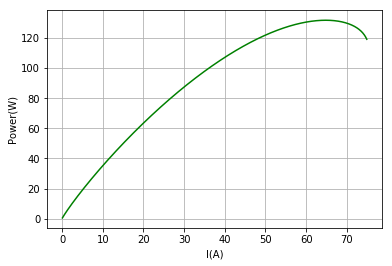

In [23]:
plot_func(data["I"],data["P"],"I(A)","Power(W)")

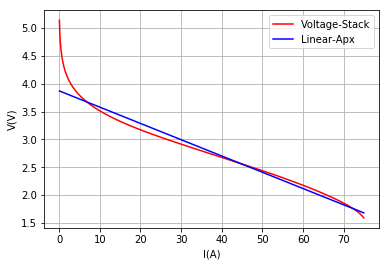

In [24]:
plot_func(data["I"],[data["V"],data["VE"]],"I(A)","V(V)",["red","blue"],legend=["Voltage-Stack","Linear-Apx"],multi=True)

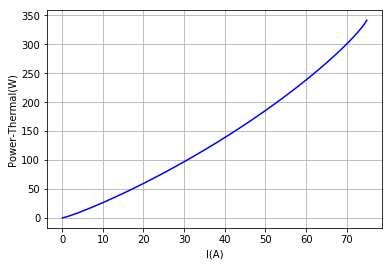

In [25]:
plot_func(data["I"],data["Ph"],"I(A)","Power-Thermal(W)","blue")

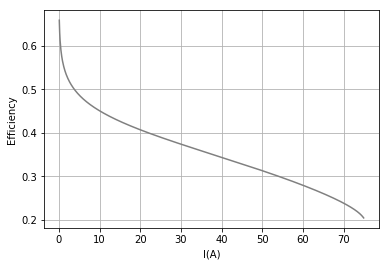

In [26]:
plot_func(data["I"],data["EFF"],"I(A)","Efficiency","gray")

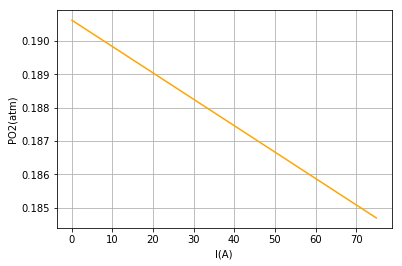

In [27]:
plot_func(data["I"],data["PO2"],"I(A)","PO2(atm)","orange")

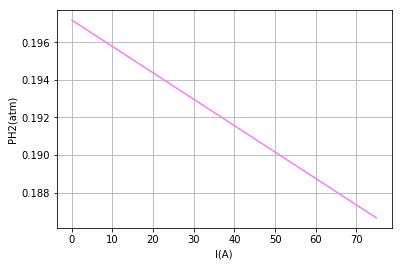

In [28]:
plot_func(data["I"],data["PH2"],"I(A)","PH2(atm)","violet")

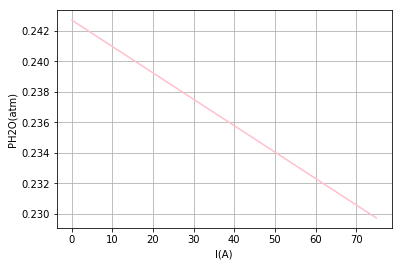

In [29]:
plot_func(data["I"],data["PH2O"],"I(A)","PH2O(atm)","pink")

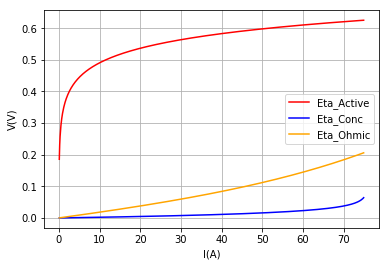

In [30]:
plot_func(data["I"],[data["Eta_Active"],data["Eta_Conc"],data["Eta_Ohmic"]],"I(A)","V(V)",["red","blue","orange"],
          legend=["Eta_Active","Eta_Conc","Eta_Ohmic"],multi=True)

<a href="Padulles-Amphlett/Padulles_Amphlett_Test.html">HTML File</a>

<a href="Padulles-Amphlett/Padulles_Amphlett_Test.opem">OPEM File</a>

<a href="Padulles-Amphlett/Padulles_Amphlett_Test.csv">CSV File</a>

## Parameters

Inputs, Constants & Middle Values
1. User : User input
2. System : Simulator calculation (middle value)

<table style="text-align:center;">
    <tr>
        <td>$$Parameter$$</td>
        <td>$$Description$$</td>
        <td>$$Unit$$</td>
        <td>$$Value$$</td>
    </tr> 
    <tr>
        <td>$$T$$</td>
        <td style="text-align:center;">Fuel cell temperature</td>
        <td>$$K$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$N_0$$</td>
        <td style="text-align:center;">Number of cells</td>
        <td>$$--$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$E_0$$</td>
        <td style="text-align:center;">No load voltage</td>
        <td>$$V$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$K_{H_2}$$</td>
        <td style="text-align:center;">Hydrogen valve constant</td>
        <td>$$kmol.s^{-1}.atm^{-1}$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$K_{H_2O}$$</td>
        <td style="text-align:center;">Water valve constant</td>
        <td>$$kmol.s^{-1}.atm^{-1}$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$K_{O_2}$$</td>
        <td style="text-align:center;">Oxygen valve constant</td>
        <td>$$kmol.s^{-1}.atm^{-1}$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$\tau_{H_2}^{(s)}$$</td>
        <td style="text-align:center;">Hydrogen time constant</td>
        <td>$$s$$</td>
        <td>$$User$$</td>
    </tr>
     <tr>
        <td>$$\tau_{H_2O}^{(s)}$$</td>
        <td style="text-align:center;">Water time constant</td>
        <td>$$s$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$\tau_{O_2}^{(s)}$$</td>
        <td style="text-align:center;">Oxygen time constant</td>
        <td>$$s$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$l$$</td>
        <td style="text-align:center;">Membrane thickness</td>
        <td>$$cm$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$A$$</td>
        <td style="text-align:center;">Active area</td>
        <td>$$cm^2$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$\tau_{1}^{(s)}$$</td>
        <td style="text-align:center;">Reformer time constant</td>
        <td>$$s$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$\tau_{2}^{(s)}$$</td>
        <td style="text-align:center;">Reformer time constant</td>
        <td>$$s$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$CV$$</td>
        <td style="text-align:center;">Conversion factor</td>
        <td>$$--$$</td>
        <td>$$User$$</td>
    </tr>
      <tr>
        <td>$$R_{electronic}$$</td>
        <td style="text-align:center;">R-Electronic</td>
        <td>$$\Omega$$</td>
        <td>$$User$$</td>
    </tr>
     <tr>
        <td>$$\lambda$$</td>
        <td style="text-align:center;">An adjustable parameter with a possible minimum value of 14 and a maximum value of 23</td>
        <td>$$--$$</td>
        <td>$$User$$</td>
    </tr>
     <tr>
        <td>$$J_{Max}$$</td>
        <td style="text-align:center;">Maximum current density of the cell</td>
        <td>$$Acm^{-2}$$</td>
        <td>$$User$$</td>
    </tr>
      <tr>
        <td>$$r_{h-o}$$</td>
        <td style="text-align:center;">Hydrogen-Oxygen flow ratio</td>
        <td>$$--$$</td>
        <td>$$User$$</td>
    </tr>
       <tr>
        <td>$$q_{methanol}$$</td>
        <td style="text-align:center;">Molar flow of methanol</td>
        <td>$$kmol.s^{-1}$$</td>
        <td>$$User$$</td>
     <tr>
        <td>$$i_{start}$$</td>
        <td style="text-align:center;">Cell operating current start point</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$i_{step}$$</td>
        <td style="text-align:center;">Cell operating current step</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$i_{stop}$$</td>
        <td style="text-align:center;">Cell operating current end point</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$B$$</td>
        <td style="text-align:center;">Constant in the mass transfer term</td>
        <td>$$V$$</td>
        <td>$$System$$</td>
    </tr>
     <tr>
        <td>$$P_{H_2}$$</td>
        <td style="text-align:center;">Hydrogen partial pressure</td>
        <td>$$atm$$</td>
        <td>$$System$$</td>
    </tr>
     <tr>
        <td>$$P_{H_2O}$$</td>
        <td style="text-align:center;">Water partial pressure</td>
        <td>$$atm$$</td>
        <td>$$System$$</td>
    </tr>
     <tr>
        <td>$$P_{O_2}$$</td>
        <td style="text-align:center;">Oxygen partial pressure</td>
        <td>$$atm$$</td>
        <td>$$System$$</td>
    </tr>
     <tr>
        <td>$$K_r$$</td>
        <td style="text-align:center;">Modeling constant</td>
        <td>$$kmol.s^{-1}.A^{-1}$$</td>
        <td>$$System$$</td>
    </tr>
      <tr>
        <td>$$q_{O_2}^{(inlet)}$$</td>
        <td style="text-align:center;">Molar flow of oxygen</td>
        <td>$$kmol.s^{-1}$$</td>
        <td>$$System$$</td>
    </tr>
     <tr>
        <td>$$q_{H_2O}^{(inlet)}$$</td>
        <td style="text-align:center;">Molar flow of water</td>
        <td>$$kmol.s^{-1}$$</td>
        <td>$$System$$</td>
    </tr>
    <tr>
        <td>$$q_{H_2}^{(inlet)}$$</td>
        <td style="text-align:center;">Molar flow of hydrogen</td>
        <td>$$kmol.s^{-1}$$</td>
        <td>$$System$$</td>
    </tr>
    <tr>
        <td>$$J$$</td>
        <td style="text-align:center;">Actual current density of the cell </td>
        <td>$$Acm^{-2}$$</td>
        <td>$$System$$</td>
    </tr> 
    <tr>
        <td>$$C_{O_2}$$</td>
        <td style="text-align:center;">Concentration of oxygen in the catalytic interface of the cathode</td>
        <td>$$molcm^{-3}$$</td>
        <td>$$System$$</td>
    </tr> 
     <tr>
        <td>$$C_{H_2}$$</td>
        <td style="text-align:center;">Concentration of hydrogen in the catalytic interface of the anode</td>
        <td>$$molcm^{-3}$$</td>
        <td>$$System$$</td>
    </tr> 
    <tr>
        <td>$$R_{Proton}$$</td>
        <td style="text-align:center;">Resistance to proton flow</td>
        <td>$$\Omega$$</td>
        <td>$$System$$</td>
    </tr> 
     <tr>
        <td>$$\xi_2$$</td>
        <td style="text-align:center;">Parametric coefficients for cell model</td>
        <td>$$--$$</td>
        <td>$$System$$</td>
    </tr> 
     <tr>
        <td>$$\xi_1$$</td>
        <td style="text-align:center;">Parametric coefficients for cell model</td>
        <td>$$--$$</td>
        <td>$$-0.948$$</td>
    </tr> 
     <tr>
        <td>$$\xi_3$$</td>
        <td style="text-align:center;">Parametric coefficients for cell model</td>
        <td>$$--$$</td>
        <td>$$7.6\times10^{-5}$$</td>
    </tr> 
     <tr>
        <td>$$\xi_4$$</td>
        <td style="text-align:center;">Parametric coefficients for cell model</td>
        <td>$$--$$</td>
        <td>$$-1.93\times10^{-4}$$</td>
    </tr>
               <tr>
        <td>$$\mu_F$$</td>
        <td style="text-align:center;">The fuel utilization</td>
        <td>$$--$$</td>
        <td>$$0.95$$</td>
    </tr>
          <tr>
    <td>$$HHV$$</td>
        <td style="text-align:center;">Higher heating value potential</td>
        <td>$$V$$</td>
        <td>$$1.482$$</td>
    </tr>
             <tr>
    <td>$$R$$</td>
        <td style="text-align:center;">Universal gas constant</td>
        <td>$$J.kmol^{-1}.K^{-1}$$</td>
        <td>$$8314.47$$</td>
    </tr>
             <tr>
    <td>$$F$$</td>
        <td style="text-align:center;">Faraday’s constant</td>
        <td>$$C.kmol^{-1}$$</td>
        <td>$$96484600$$</td>
    </tr>
    <tr>
    <td>$$E_{th}$$</td>
        <td style="text-align:center;">Theoretical potential</td>
        <td>$$V$$</td>
        <td>$$1.23$$</td>
    </tr>
    
    
    
</table>

* Notice : $$q_{H_2}=q_{H_2O}$$

## Reference
<blockquote>
1- J. Padulles, G.W. Ault, J.R. McDonald. 2000. "An integrated SOFC plant dynamic model for power systems
simulation." Journal of Power Sources (Elsevier) 86 (1-2): 495-500. doi:10.1016/S0378-7753(99)00430-9
</blockquote>
<blockquote>
2- Hauer, K.-H. 2001. "Analysis tool for fuel cell vehicle hardware and software (controls) with an application
to fuel economy comparisons of alternative system designs." Ph.D. dissertation, Transportation Technology
and Policy, University of California Davis.
</blockquote>
<blockquote>
3- J. C. Amphlett, R. M. Baumert, R. F. Mann, B. A. Peppley, and P. R. Roberge. 1995. "Performance Modeling
of the Ballard Mark IV Solid Polymer Electrolyte Fuel Cell." J. Electrochem. Soc. (The Electrochemical Society,
Inc.) 142 (1): 9-15. doi: 10.1149/1.2043959.
</blockquote>
<blockquote>
4- Larminie, J., Dicks, A., & McDonald, M. S. 2003. Fuel cell systems explained (Vol. 2, pp. 207-225). Chichester, UK: J. Wiley. doi: 10.1002/9781118706992.
</blockquote>